# Problem Statement:


# About Delhivery : 

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


# Business Problem Statement  :


- The company wants to understand and process the data coming out of data engineering pipelines:

>• Clean, sanitize and manipulate data to get useful features out of raw fields

>• Make sense out of the raw data and help the data science team to build forecasting models on it.

# Importing Libraries:

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy.stats import t
from scipy import stats

In [361]:
pd.set_option('display.max_columns', None)

In [362]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

#1.Basic data cleaning and exploration:

In [364]:
df.shape

(144867, 24)

- 144,867 total records, 24 columns 

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [366]:
df.isna().sum().sort_values()

data                                0
segment_osrm_time                   0
segment_actual_time                 0
factor                              0
osrm_distance                       0
osrm_time                           0
actual_time                         0
actual_distance_to_destination      0
cutoff_timestamp                    0
cutoff_factor                       0
is_cutoff                           0
start_scan_to_end_scan              0
od_end_time                         0
od_start_time                       0
destination_center                  0
source_center                       0
trip_uuid                           0
route_type                          0
route_schedule_uuid                 0
trip_creation_time                  0
segment_osrm_distance               0
segment_factor                      0
destination_name                  261
source_name                       293
dtype: int64

- features : source_name and destination_name having few missing values

## Changing data type for data and time related features : 


In [367]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

## Extracting Trip Creation Informations from Trip Creation time : 

In [368]:
df["trip_creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: trip_creation_time, dtype: int64

In [369]:
df["trip_creation_time"].dt.year.value_counts()

2018    144867
Name: trip_creation_time, dtype: int64

- delivery trip data is given from September and October 2018


In [370]:
df["trip_creation_day"] = (df["trip_creation_time"].dt.day_name())
df["trip_creation_month"] = (df["trip_creation_time"].dt.month_name())
df["trip_creation_year"] = (df["trip_creation_time"].dt.year)

<AxesSubplot: >

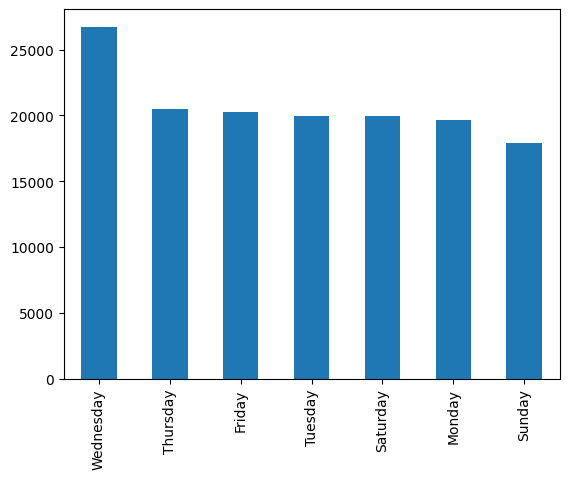

In [371]:
df["trip_creation_day"].value_counts().plot(kind = "bar")

In [372]:
df["trip_creation_day"].value_counts(normalize=True)*100

Wednesday    18.452788
Thursday     14.137795
Friday       13.972816
Tuesday      13.778845
Saturday     13.761588
Monday       13.560714
Sunday       12.335453
Name: trip_creation_day, dtype: float64

- wednesday seems to have relatively higher records of data compare to other days 

## There are two different kind of routes are there:

In [374]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [375]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100

Carting    60.120132
FTL        39.879868
Name: route_type, dtype: float64

In [376]:
routeType_plot= (df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts(normalize = True)*100)
routeType_plot

Carting    60.120132
FTL        39.879868
Name: route_type, dtype: float64

## Undestanding Features and Feature Engineering  :



## Analyzing records for one particular trip id : 


In [378]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,trip_creation_month,trip_creation_year
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,September,2018
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,September,2018
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,September,2018
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,September,2018
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,September,2018
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Thursday,September,2018
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Thursday,September,2018
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Thursday,September,2018
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,Thursday,September,2018
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320

    from above one particular trip record , trip is segmented between different drop locations .

    we can observe 
    trip is taking stops between mentioned source and destination centers(warehouses).
    od-end-tiem and od-start-time are the time when the that particular trip was ended and started .

    start-scan-to-end-scan is the time duration of trips are being scanned when start and end. 
    start-scan-to-end-scan time is given cummulative. which is not given per trip segments.


    trip cut off False ,shows the record of trip when trip changes from one warehouse to another. between source to destination. 


    Actual-time given is the time to complete the entire delivery from source to destination (given cumulatively )




    osrm -time is an open rourse routing engine time calculator which computes the shortest path between points in a given map and gives the time and osrm distance gives the shortest distance (given cumulatively )


    Actual-distnace-to-destination is the actual distance between warehouses , given cummulative during the trip . 
    every time cutoff is False , distance count starts from begining. 

    Segmment actual time,  is the actual time taken between two stops in between trips. given per each segment (taken between subset of package delivery)

    segment osrm time is the osrm segment time , taken between subset of package delivery



#2.Build some features to prepare the data for actual analysis. Extract features from the below fields:



### Extracting Features like city - place - code -state from source and destination name columns : 

In [379]:
df["source_city"] = df["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [380]:
df["source_place"] = df["source_name"].str.split("_",n=2,expand=True)[1]
df["destination_place"] = df["destination_name"].str.split("_",n=2,expand=True)[1]

In [381]:
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )


####  Time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan : 

In [383]:
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

#### Converting given time duration features into hours . 
    start_scan_to_end_scan
    actual_time
    osrm_time
    segment_actual_time
    segment_osrm_time
    

In [384]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60


# Aggregating Data : 

In [402]:
actual_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()
segment_osrm_time = data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_actual_time = data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
osrm_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
time_taken_btwn_odstart_and_od_end = data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()

time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 

osrm_distance = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()
actual_distance_to_destination = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()
segment_osrm_distance = data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()


****

#3.In-depth analysis and feature engineering:

## Hypothesis Tests for time durations and distance related features : 


### Analysing TimeTaken Between OdStart to OdEnd time & StartScan to EndScan : 

> #### H0: Mean of time taken between start and end, trip time = Mean of start and end, scan time
> #### Ha: Mean of time taken between start and end, trip time != Mean of start and end, scan time


<AxesSubplot: xlabel='start_scan_to_end_scan', ylabel='Density'>

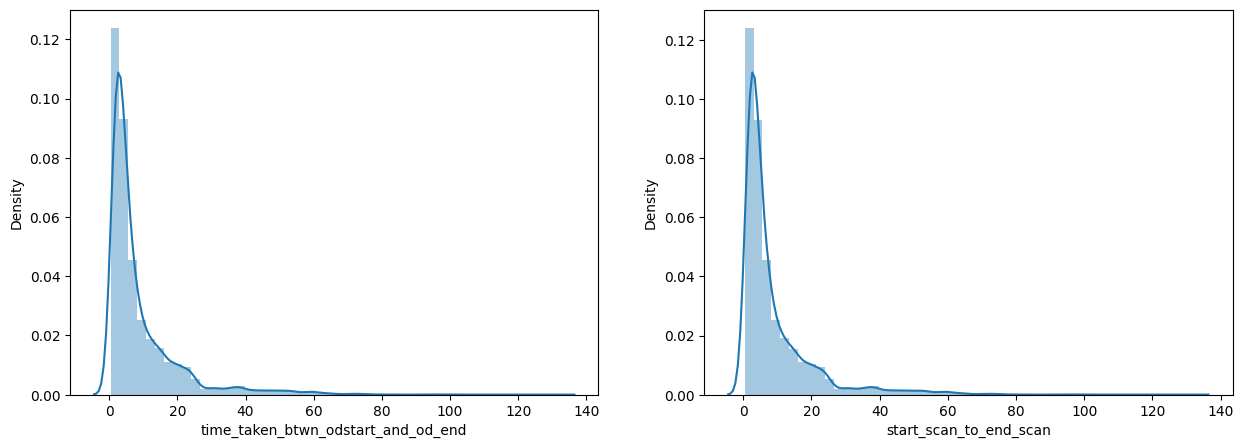

In [403]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

In [404]:
# KS-test : Checking the distributions how closely and equally they are : 
stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"], start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=0.004184382803536474, pvalue=0.9994337058695081)

In [405]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000))
                ,(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))))

Ttest_indResult(statistic=-6.13025093146916, pvalue=1.0543788619071279e-09)
Ttest_indResult(statistic=-6.3527696643644616, pvalue=2.611464999798634e-10)
Ttest_indResult(statistic=-4.759018622389678, pvalue=2.0848451906784816e-06)
Ttest_indResult(statistic=-7.27375516000154, pvalue=4.99706559657236e-13)
Ttest_indResult(statistic=-3.6693236342724114, pvalue=0.0002495645191259375)


In [406]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind((actual_time["actual_time"].sample(1000))
                ,(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000)))

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


- from Kolmogorov–Smirnov test , p-value is 0.9943 , from which we can conclude tht both the distributions `(time_taken_btwn_odstart_and_od_end and start_scan_to_end_scan)` are closely similar.

- from 2 sample t-test, we can also conclude that `average time_taken_btwn_odstart_and_od_end` for population is also equal to `average start_scan_to_end_scan` for population.

In [407]:
# Also checking mean and standard deviation for Trip time: 
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean(),time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].std()

(8.861857235305113, 10.981665759990634)

In [408]:
# Also checking mean and standard deviation for Scan time : 
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.976286391439693)

- variance and mean both are closely similar for `trip start and end time` and `scan time`  

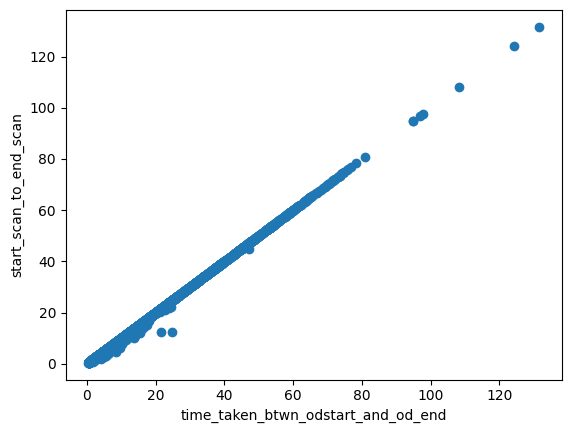

In [409]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"], start_scan_to_end_scan["start_scan_to_end_scan"])
plt.xlabel('time_taken_btwn_odstart_and_od_end')
plt.ylabel('start_scan_to_end_scan')
plt.show()

## Analysing Actual Time taken to complete the delivery  &  start-scan-end-scan

> #### H0: Mean of start and end scan time <=  Mean of Actual time taken to complete delivery 
> #### Ha: Mean of start and end scan time  > Mean of Actual time taken to complete delivery


<AxesSubplot: xlabel='start_scan_to_end_scan', ylabel='Density'>

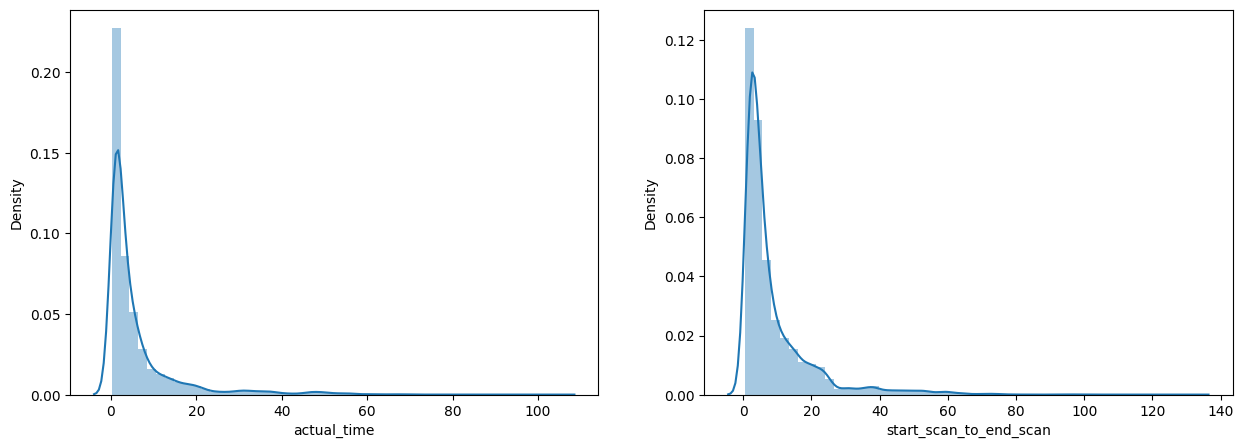

In [410]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

In [411]:
# KS-test : Checking the distributions how closely and equally they are
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=0.27387460349598436, pvalue=0.0)

In [412]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less"))

Ttest_indResult(statistic=-10.326967797817135, pvalue=4.288385585048058e-25)
Ttest_indResult(statistic=-12.688138098347808, pvalue=1.0074497177490372e-36)
Ttest_indResult(statistic=-11.052315143496797, pvalue=1.9929288943284576e-28)
Ttest_indResult(statistic=-10.7314949636943, pvalue=6.30904552029196e-27)
Ttest_indResult(statistic=-11.328429408667912, pvalue=9.434382197089143e-30)
Ttest_indResult(statistic=-9.185331878545767, pvalue=2.7714317569816137e-20)
Ttest_indResult(statistic=-9.669507871162713, pvalue=2.936361751225992e-22)


In [413]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind((actual_time["actual_time"].sample(3000)), (start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less")

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0, average actual_time is less than population average start_scan_to_end_scan")
else:
    print("average actual_time is greater than or equal to population average start_scan_to_end_scan")

Reject H0, average actual_time is less than population average start_scan_to_end_scan


- from KS test for actual-time and start_scan_to_end_scan distributions are not same.

- t test of population average actual_time is less than population average start_scan_to_end_scan.

In [414]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.355547822973838)

In [415]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.976286391439693)

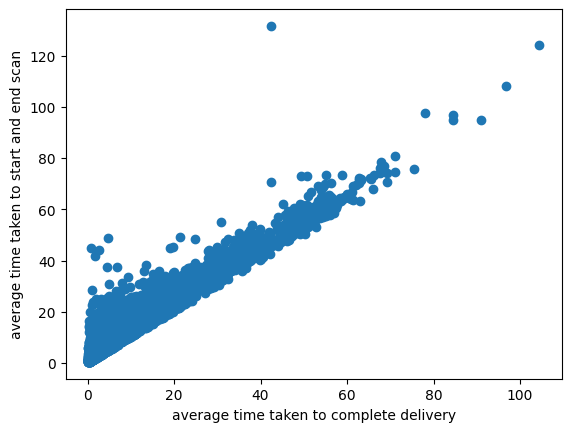

In [416]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])
plt.xlabel('average time taken to complete delivery')
plt.ylabel('average time taken to start and end scan')
plt.show()

## Analysing and Visulizing OSRM Estimated distance and Actual Distance between source and destination warehouse :

> #### H0 : Mean OSRM distance <= Mean Actual distnace 
> #### Ha : Mean OSRM distance > Mean Actual distnace 

## After removing outliers from all numerical features :  

In [464]:
trip_records_without_outliers = trip_records.loc[outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)].index]
trip_records_without_outliers.head(3)

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...


In [456]:
trip_records_without_outliers = trip_records_without_outliers[['trip_uuid','route_type','source_city_state', 'destination_city_state','segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
       'segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']]

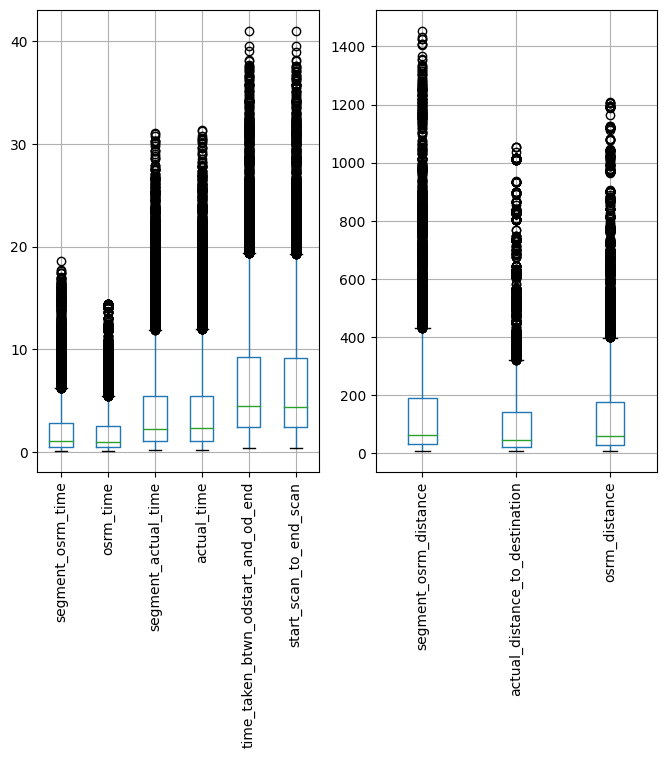

In [465]:
plt.figure(figsize = (8,6))
plt.subplot(121)
trip_records_without_outliers[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records_without_outliers[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [458]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [459]:
scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.394178,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.445632,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.443566,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.318061,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.567441,-0.566761,-0.549293,-0.536356,-0.565995


In [460]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(encoded_data[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.069369,0.059302,0.098113,0.098719,0.098792,0.098811,0.046420,0.031804,0.036747
1,0.056757,0.054651,0.081402,0.081644,0.090329,0.090201,0.034665,0.018854,0.028743
2,0.058559,0.060465,0.102426,0.101921,0.090669,0.090611,0.039132,0.031718,0.044799
3,0.032432,0.044186,0.037736,0.037353,0.111311,0.111111,0.022697,0.022551,0.027493
4,0.036937,0.039535,0.051752,0.051761,0.070296,0.070111,0.020957,0.019694,0.022047


In [466]:
std_data.head(3)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.394178,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.445632,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.443566,-0.441900,-0.416136,-0.451494,-0.414618


# Route analysis : 

In [ ]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]
C = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]
D = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]
F = data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]
G = trip_records.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = trip_records["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]

In [ ]:
I = data.groupby("route_schedule_uuid")[["source_city",
                                         "destination_city"]].nunique().sort_values(by="source_city",
                                                                                     ascending=False).reset_index()
I.columns = ["route_schedule_uuid","#source_cities"
             ,"#destination_cities"]

In [ ]:
route_records = I.merge(H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer")

##  Exploratory Data Analysis : ( getting some  insights from preprocessed data ) : 

# Busiest and Longest Routes : 

In [ ]:
Busiest_and_Longest_Routes  = route_records[(route_records["Average_Actual_distance_to_destination"] > route_records["Average_Actual_distance_to_destination"].quantile(0.75)) 
              & (route_records["Number_of_Trips"] > route_records["Number_of_Trips"].quantile(0.75))].sort_values(by="Average_Actual_distance_to_destination"
                                                                                                                  ,ascending=False)

In [ ]:
Busiest_and_Longest_Routes_top25 = Busiest_and_Longest_Routes[["source_cities",
                                                               "destination_cities",
                                                               "Number_of_Trips",
                                                               "Average_Actual_distance_to_destination"]].head(25)
Busiest_and_Longest_Routes_top25

> #### Above Table shows the souce to destination city routes having largest numbers of trip happening having large distnaces :
    which are : Chandigarh TO Bengaluru
                Gurgaon TO Bengaluru
                Bengaluru TO Kolkata
                Guwahati TO Delhi
                Delhi  TO Kolkata
                Chandigarh TO Gurgaon 
                Gurgaon TO Hydrabad
                Benglore TO Ahmedabad
                Surat TO Delhi
                Gurgaon TO Ahmedabad

In [ ]:
Busiest_and_Longest_Routes_top25["Route"] = Busiest_and_Longest_Routes_top25["source_cities"].str.split(" ").apply(lambda x:x[0]) + " TO " + Busiest_and_Longest_Routes_top25["destination_cities"].str.split(" ").apply(lambda x:x[-1])

In [ ]:
Busiest_and_Longest_Routes_top25.drop(["source_cities","destination_cities"],axis = 1,inplace=True)


In [ ]:
plt.figure(figsize=(18,7))

plt.subplot(121)
plt.title("Number of trips per route")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y = Busiest_and_Longest_Routes_top25["Number_of_Trips"])
plt.xticks(rotation = 90)
plt.subplot(122)
plt.title("Routes as per Distances between source and destination locations")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y= Busiest_and_Longest_Routes_top25["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

## Routes : passing through maxinum number of cities : 

In [ ]:
route_records[["SouceToDestination_city","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by=["#source_cities",
                                                       "#destination_cities",
                                                       "Number_of_Trips"]
                                                   ,ascending=False).head(25)

### Top 20 warehouses with heavy traffic : 

In [ ]:
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

In [ ]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)


In [ ]:
plt.figure(figsize=(11,8))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

> #### Top 20 Busiest Warehouse (junctions) as per trips traffic at the juction : are
 'Bengaluru Karnataka',
 'Gurgaon Haryana',
 'Mumbai Maharashtra',
 'Bhiwandi Maharashtra',
 'Hyderabad Telangana',
 'Delhi Delhi',
 'Pune Maharashtra',
 'Chandigarh Punjab',
 'Chennai Tamil Nadu',
 'Sonipat Haryana',
 'Kolkata West Bengal',
 'Ahmedabad Gujarat',
 'MAA Tamil Nadu',
 'Jaipur Rajasthan',
 'Kanpur Uttar Pradesh',
 'Surat Gujarat',
 'Muzaffrpur Bihar',
 'FBD Haryana',
 'Bhopal Madhya Pradesh',
 'Noida Uttar Pradesh'
        

In [ ]:
trip_records.groupby(["source_state","destination_state"])["trip_uuid"].count().sort_values(ascending=False).head(15).reset_index()

# Inferences and Recommendations : 

## Insights and Observations : 

- 14817 different trips happened between source to destinations during 2018 , September and October.
- 1504 delivery routes on which trips are happenig.
- we have 1508 unique source centers and 1481 unique destination centers


- From 14817 total different trips , we have  8908 (60%) of the trip-routes are Carting , which consists of small vehicles and 5909 (40%) of total trip-routes are FTL : which are Full Truck Load get to the destination sooner. as no other pickups or drop offs along the way .

#### Hypothesis tests Results : 
  - from 2 sample t-test ,we can also conclude that 
  
  - Average time_taken_btwn_odstart_and_od_end for population is equal to Average start_scan_to_end_scan for population.

  - population average actual_time is less than population average start_scan_to_end_scan.

  - population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

  - Mean of actual time is higher than Mean of the OSRM estimated time for delivery

  - Population average for Actual Time taken to complete delivery trip and segment actual time are same.

  - Average of OSRM Time & segment-osrm-time for population is not same.
  
  - Population Mean osrm time is less than Population Mean segment osrm time.

  - Average of OSRM distance for population is less than average of segment OSRM distance

  - population OSRM estimated distance is higher than the actual distance from source to destination warehouse.



#### From Exploratory Data Analysis


- we can observe that Mumbai Maharashtra ,Delhi , Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana, Chennai Tamil Nadu, Ahmedabad-Gujarat, Pune Maharashtra, Chandigarh Chandigarh and Kolkata West Bengal are some cities have higest amount of trips happening states with in the city. 
- If we talk about , not having equal source and destination states , source and destination cities having higest number of trips in between are : Delhi TO Gurgao ,  Gurgaon  TO Bengaluru ,  Bhiwandi/Mumbai TO Pune Maharashtra ,    Sonipat TO    Gurgaon,Haryana
- It is also been observed that lots of deliveries are happening to airpots  like : Chennai to MAA chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to    CCU West Bengal Kolkata International Airport , Bengluru to BLR-Bengaluru International Airport etc. 



- From Bar charts , and calculated tables in analysis , we can observe that higest trips are happening is with in the particular cities, in terms of average distance between destinations , we can observe Guwahati to Mumbai , Benglore to Chandigarh ,Benglore to Delhi , Benglore to Gurgaon are the longest routes.

- #### the souce to destination city routes having largest numbers of trip happening having large distnaces
    - Guwahati TO Bhiwandi, Bengaluru TO Chandigarh, Bengaluru TO Delhi,Gurgaon TO MAA Chennai Airport,Bhiwandi TO Kolkata, Bengaluru TO Kolkata, Gurgaon TO Hyderabad, Gurgaon TO Kolkata


#### the routes which covered multiple cities in between source and destination :
- Most covered cities routes are : Guwahati TO LakhimpurN , Jaipur TO Tarnau , Guwahati TO Tura , Mangalore TO Udupi , Ajmer TO Raipur , Mainpuri TO Tilhar . which passes through  more than 8 cities.

#### Routes which are busiest from source to destinations and states in which highest activities are noticed :
- Delhi to Haryana is the busiest route, having more than 400 trips in between. Some of such busy routes are Haryana to Uttar Pradesh , Chandigarh to Punjab , Delhi to Uttar Pradesh . 
- Within the state , Maharashtra , Karnataka, Tamil Nadu, Haryana, Telangana, Gujarat , West Benglore and Uttar Pradesh are some states having above 1000 trips.


#### From above chart are some warehouse having Maximum traffic and hence busiest junctions. 
- Bengaluru Karnataka, Gurgaon Haryana, Mumbai Maharashtra, Hyderabad Telangana, Delhi, Pune Maharashtra, Chandigarh Punjab, Chennai Tamil Nadu, Sonipat Haryana, Kolkata West Bengal, Ahmedabad Gujarat, MAA Tamil Nadu, Jaipur Rajasthan, Kanpur Uttar Pradesh, Surat Gujarat, Muzaffrpur Bihar, FBD Haryana, Bhopal Madhya Pradesh, Noida Uttar Pradesh.

## Recommendations : 

- As per analysis, It is recommended to use Carting (small vehicles) for delivery with in the city in order to reduce the delivery time, and Heavy trucks for long distance trips or heavy load. based on this , we can optimize the delivery time as well as increase the revenue as per requirements. 
- Incresing the connectivity in tier 2 and tier 3 cities along with profession tie-ups with several e-commerce giants can increase the revenue as well as the reputation on connectivity across borders. 
- We can work on  optimizing the scanning time on both ends which is start scanning time and end scanning time so that the delivery time can be equated to the OSRM estimated delivery time.

